In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,date, timedelta
import seaborn as sns
from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier
from sklearn.linear_model import LinearRegression

In [2]:
#Load Data
data = pd.read_csv("Nat_Gas.csv")
#Convert to datetime object
data["Dates"] = pd.to_datetime(data["Dates"])
#Set index to dates and frequency to month end
data = data.set_index("Dates").asfreq('ME')

/var/folders/bg/5dmr_ymn0g7d0fqz7043vr8c0000gp/T/ipykernel_13801/3214635457.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Dates"] = pd.to_datetime(data["Dates"])


In [3]:
dp = DeterministicProcess(
    index=data.index,       # Must be a DatetimeIndex
    constant=True,
    order=1,
    seasonal=True,
    drop=True
)
X = dp.in_sample()
seasonality = LinearRegression()
seasonality.fit(X, data["Prices"])
X_future = dp.out_of_sample(90)  # Works now

In [4]:
train_res = pd.DataFrame({
    "Time": X.index.map(lambda x: x.timestamp()), 
    "Prediction": seasonality.predict(X)
})
test_res = pd.DataFrame({
    "Time": X_future.index.map(lambda x: x.timestamp()),
    "Prediction":seasonality.predict(X_future)
})

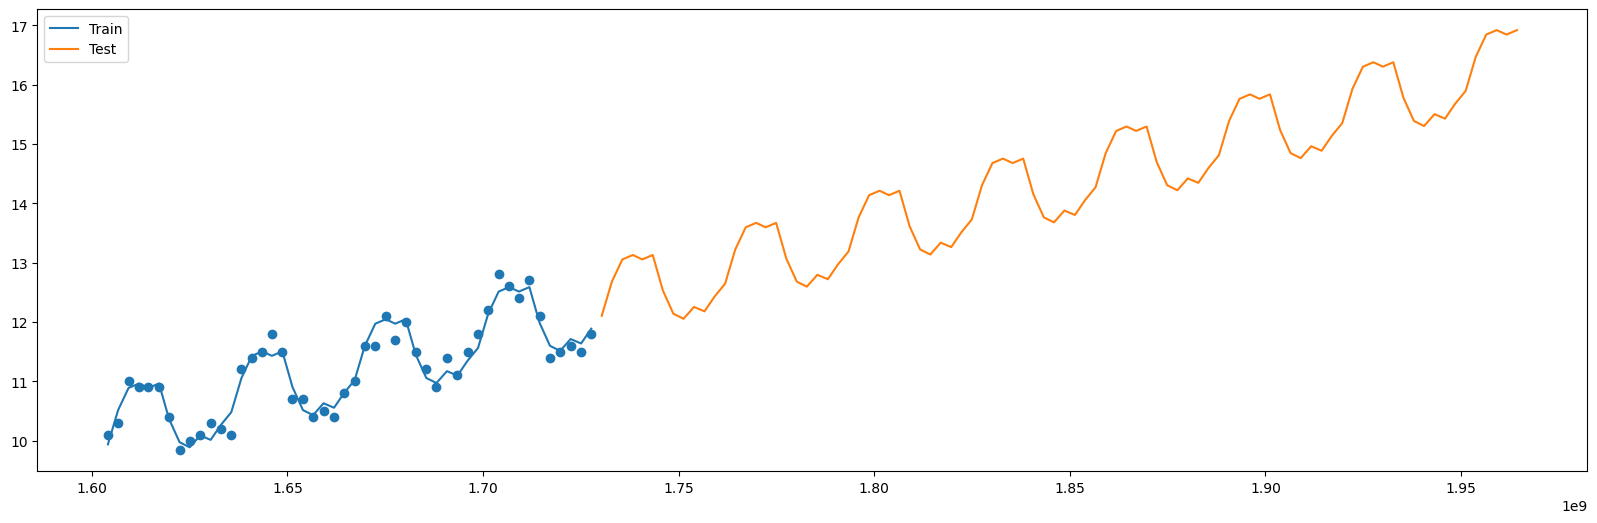

In [5]:
plt.figure(figsize=(20,6))
plt.plot(train_res["Time"], train_res["Prediction"], label = "Train")
plt.scatter(data.index.map(lambda x: x.timestamp()), data["Prices"])
plt.plot(test_res["Time"], test_res["Prediction"], label = "Test")
plt.legend()
plt.show()

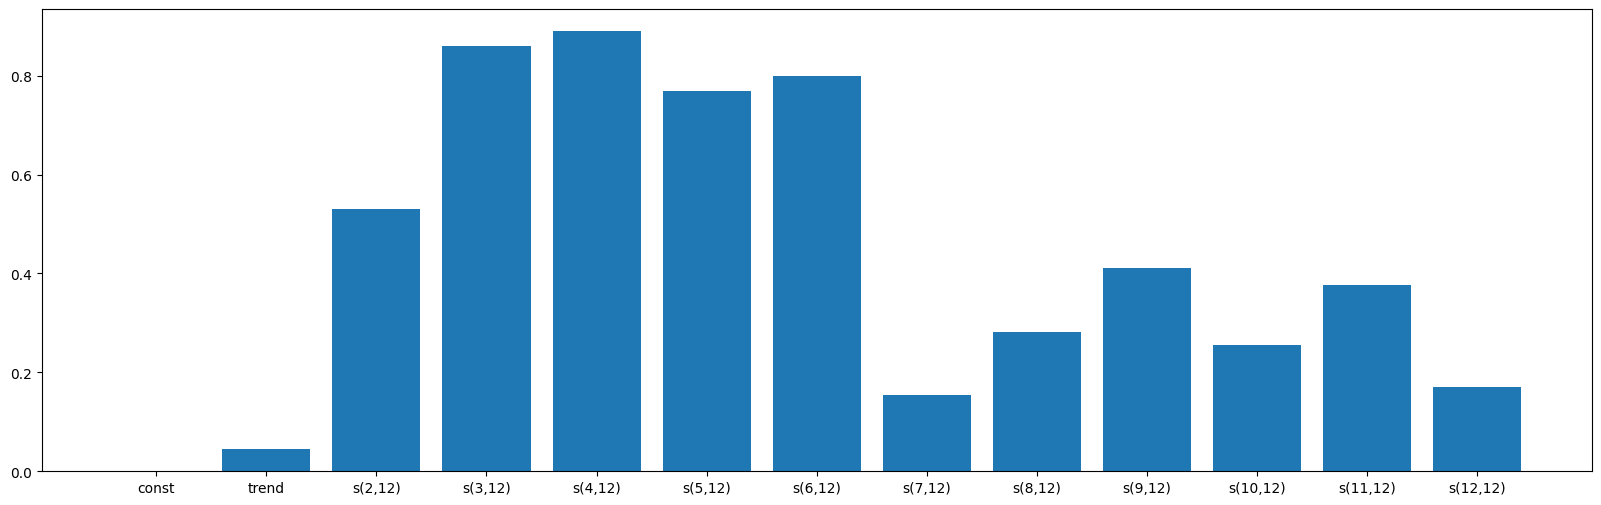

In [17]:
ranked_features = pd.DataFrame({
    "Feature":X.columns,
    "Importance":seasonality.coef_
})
plt.figure(figsize=(20,6))
plt.bar(x = ranked_features["Feature"], height = ranked_features["Importance"].map(lambda x: abs(x)))
plt.show()